In [143]:
import pandas as pd
import numpy as np
from finance_byu.summarize import summary
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# Read in crsp monthly data

df = pd.read_feather("crsp_monthly.ftr")

df.head()

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr
0,10000,1986-01-31,68391610,OMFGA,10,3,3990,-4.37500,NaN,1771.0,3680.0,1.0
1,10000,1986-02-28,68391610,OMFGA,10,3,3990,-3.25000,-0.257143,828.0,3680.0,1.0
2,10000,1986-03-31,68391610,OMFGA,10,3,3990,-4.43750,0.365385,1078.0,3680.0,1.0
3,10000,1986-04-30,68391610,OMFGA,10,3,3990,-4.00000,-0.098592,957.0,3793.0,1.0
4,10000,1986-05-30,68391610,OMFGA,10,3,3990,-3.10938,-0.222656,1074.0,3793.0,1.0


In [145]:
# Cleaning

df['prc'] = abs(df['prc'])

df.sort_values(by=['permno', 'caldt'], inplace=True)

df = df[['permno', 'caldt', 'prc', 'ret']]

df.head()

,permno,caldt,prc,ret
0,10000,1986-01-31,4.37500,NaN
1,10000,1986-02-28,3.25000,-0.257143
2,10000,1986-03-31,4.43750,0.365385
3,10000,1986-04-30,4.00000,-0.098592
4,10000,1986-05-30,3.10938,-0.222656


In [146]:
# Calculate momentum feature

# Log Returns
df['logret'] = np.log(1 + df['ret'])

# Momentum from t-6 to t-1
df['mom'] = df.groupby('permno')['logret'].rolling(5,5).sum().reset_index(drop=True)
df['mom'] = df.groupby('permno')['mom'].shift(2)

# Holding period returns
df['ret_6'] = df.groupby('permno')['logret'].rolling(6,6).sum().reset_index(drop=True)
df['ret_6'] = df.groupby('permno')['ret_6'].shift(-6)

df

,permno,caldt,prc,ret,logret,mom,ret_6
0,10000,1986-01-31,4.37500,NaN,NaN,NaN,-0.430783
1,10000,1986-02-28,3.25000,-0.257143,-0.297252,NaN,-1.089044
2,10000,1986-03-31,4.43750,0.365385,0.311436,NaN,-1.459321
3,10000,1986-04-30,4.00000,-0.098592,-0.103797,NaN,-1.633155
4,10000,1986-05-30,3.10938,-0.222656,-0.251872,NaN,-1.323014
...,...,...,...,...,...,...,...
4889699,93436,2023-08-31,258.07999,-0.034962,-0.035588,0.412904,NaN
4889700,93436,2023-09-29,250.22000,-0.030456,-0.030929,0.262391,NaN
4889701,93436,2023-10-31,200.84000,-0.197346,-0.219832,0.218332,NaN
4889702,93436,2023-11-30,240.08000,0.195379,0.178463,0.420586,NaN


In [147]:
# Filtering by prc greater than 5 and months that momentum is known

df['prclag'] = df.groupby('permno')['prc'].shift(1)

df = df.query("mom == mom and prclag >= 5").reset_index(drop=True)

df

,permno,caldt,prc,ret,logret,mom,ret_6,prclag
0,10001,1986-08-29,6.50000,0.072165,0.069680,0.031935,-0.007995,6.06250
1,10001,1986-09-30,6.37500,-0.003077,-0.003082,0.001476,0.031226,6.50000
2,10001,1986-10-31,6.62500,0.039216,0.038467,0.046268,-0.047246,6.37500
3,10001,1986-11-28,7.00000,0.056604,0.055060,0.033334,-0.176415,6.62500
4,10001,1986-12-31,7.00000,0.015000,0.014889,0.081653,-0.141153,7.00000
...,...,...,...,...,...,...,...,...
3640933,93436,2023-08-31,258.07999,-0.034962,-0.035588,0.412904,NaN,267.42999
3640934,93436,2023-09-29,250.22000,-0.030456,-0.030929,0.262391,NaN,258.07999
3640935,93436,2023-10-31,200.84000,-0.197346,-0.219832,0.218332,NaN,250.22000
3640936,93436,2023-11-30,240.08000,0.195379,0.178463,0.420586,NaN,200.84000


In [148]:
# Momentum decile bins

df['mombins'] = df.groupby("caldt")['mom'].transform(lambda x: pd.qcut(x, 10, labels=False))

df

,permno,caldt,prc,ret,logret,mom,ret_6,prclag,mombins
0,10001,1986-08-29,6.50000,0.072165,0.069680,0.031935,-0.007995,6.06250,2
1,10001,1986-09-30,6.37500,-0.003077,-0.003082,0.001476,0.031226,6.50000,4
2,10001,1986-10-31,6.62500,0.039216,0.038467,0.046268,-0.047246,6.37500,5
3,10001,1986-11-28,7.00000,0.056604,0.055060,0.033334,-0.176415,6.62500,6
4,10001,1986-12-31,7.00000,0.015000,0.014889,0.081653,-0.141153,7.00000,7
...,...,...,...,...,...,...,...,...,...
3640933,93436,2023-08-31,258.07999,-0.034962,-0.035588,0.412904,NaN,267.42999,9
3640934,93436,2023-09-29,250.22000,-0.030456,-0.030929,0.262391,NaN,258.07999,9
3640935,93436,2023-10-31,200.84000,-0.197346,-0.219832,0.218332,NaN,250.22000,9
3640936,93436,2023-11-30,240.08000,0.195379,0.178463,0.420586,NaN,200.84000,9


In [149]:
# Form portfolios on momentum bins

# Portfolio df for backtest
port = df.groupby(['caldt', 'mombins'])['ret'].mean().unstack(level=['mombins'])*100

# Portfolio df for summary stats
port_6 = df.groupby(['caldt', 'mombins'])['ret_6'].mean().unstack(level=['mombins'])*100

# Drop rows from port_6 where we don't know the holding return
port_6 = port.dropna()

# Spread portfolios
port['spread'] = port[9] - port[0]
port_6['spread'] = port[9] - port[0]

port.head()

mombins,0,1,2,3,4,5,6,7,8,9,spread
caldt,,,,,,,,,,,
1926-07-31,1.081077,-0.551389,0.749836,1.113807,3.436850,1.549955,1.657405,2.495889,0.891857,2.920570,1.839493
1926-08-31,3.041917,1.553702,0.930479,2.912926,2.643557,2.058270,1.736123,4.875630,4.329777,3.771660,0.729743
1926-09-30,-4.932596,-1.136743,-4.217285,0.088511,0.073817,-1.684781,0.534547,1.605744,2.181998,0.899002,5.831598
1926-10-30,-5.973296,-4.801602,-1.790447,-3.733021,-2.993467,-0.960750,-2.907808,-3.823659,-5.171890,-4.015245,1.958051
1926-11-30,-3.976022,1.044873,1.495848,3.887978,1.586984,2.638327,4.233649,4.887977,5.161235,3.752908,7.728931


In [150]:
# Summary

summary(port_6).loc[['count','mean','std','tstat']].round(3)

mombins,0,1,2,3,4,5,6,7,8,9,spread
count,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000
mean,0.350,0.884,0.985,1.001,1.071,1.082,1.096,1.121,1.246,1.445,1.095
std,8.809,7.425,6.636,6.138,5.878,5.563,5.630,5.542,5.980,6.954,5.881
tstat,1.359,4.071,5.076,5.580,6.231,6.653,6.656,6.918,7.127,7.110,6.371


In [151]:
# Backtest

# Filtering to the last ~15 years
port = port[port.index >= '2010-01-01']

# Calculating cummulative compounded return using monthly rebalancing
port['cum_ret'] = ((port['spread']/100)+1).cumprod()
port['cum_ret'] = port['cum_ret']-1

port.head()

mombins,0,1,2,3,4,5,6,7,8,9,spread,cum_ret
caldt,,,,,,,,,,,,
2010-01-29,-0.639932,-2.076927,-1.442619,-2.019196,-1.186116,-2.799293,-3.066493,-3.631406,-3.629166,-5.127703,-4.487772,-0.044878
2010-02-26,1.936890,2.689187,2.434372,2.548282,2.893713,3.506981,3.525271,4.465399,5.297824,6.180088,4.243198,-0.004350
2010-03-31,6.448296,6.981151,6.391632,6.487792,5.671834,6.063431,6.280053,6.848365,6.402609,6.987512,0.539216,0.001019
2010-04-30,5.788299,4.453862,3.317909,2.831539,3.308262,3.489343,4.001887,3.690911,4.679059,5.188605,-0.599694,-0.004984
2010-05-28,-6.805961,-6.128274,-5.915805,-5.784340,-7.166714,-7.035604,-7.522651,-7.999378,-7.826183,-8.752319,-1.946358,-0.024351


Text(0.5, 0, 'Date')

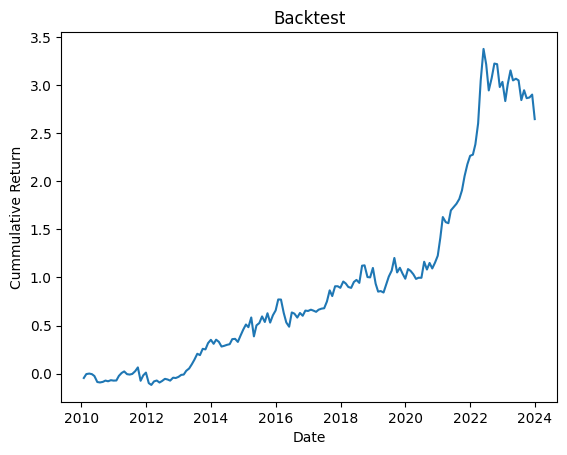

In [152]:
sns.lineplot(data=port,x='caldt',y='cum_ret')
plt.title("Backtest")
plt.ylabel("Cummulative Return")
plt.xlabel("Date")